In [122]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd
pd.set_option('display.max_columns',15)

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import missingno

from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn import metrics

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [123]:
train_df = pd.read_csv(r'F:\Datasets\end_to_end_data_sets\end to end data sets\titanic_train.csv')
test_df = pd.read_csv(r'F:\Datasets\end_to_end_data_sets\end to end data sets\titanic_test.csv')

In [124]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [125]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Cunningham, Mr. Alfred Fleming",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [126]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [127]:
#We can readily drop the PassengerID, Cabin fields
train_df.drop(labels=['PassengerId','Cabin'],inplace=True,axis=1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [128]:
#Replace missing values in embarked with the most appeared value
train_df['Embarked'].fillna(value=train_df['Embarked'].mode()[0],inplace=True)
train_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

To fix the age field, I will extract title from the name and impute null ages with the mean age of other passengers with same title

In [129]:
train_df['Title']=train_df['Name'].apply(lambda val: val.split(',')[1].split('.')[0].strip())
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
the Countess      1
Mme               1
Lady              1
Don               1
Ms                1
Capt              1
Sir               1
Jonkheer          1
Name: Title, dtype: int64

Considering the meaning of some titles, I will rename them to be top

In [130]:
train_df['Title'].replace({'Ms':'Miss'},inplace=True)
train_df['Title'].replace(['Dr','Rev','Major','Col','Mlle','Lady','Mme','Capt','Jonkheer','the Countess','Don','Sir'],'Top',
                            inplace=True)
train_df['Title'].value_counts()

Mr        517
Miss      183
Mrs       125
Master     40
Top        26
Name: Title, dtype: int64

In [131]:
avg_age_title = {}
for title in pd.unique(train_df['Title']):
    avg_age_title[title] = np.mean(train_df[train_df['Title']==title]['Age'])
    
print( avg_age_title)

age=list()
###now fill the NAN in Age with the average of all people having the same title
for ind in list(train_df[(train_df['Age'].isna()==True)].index):
    train_df['Age'][ind]=avg_age_title[train_df.loc[ind]['Title']]

train_df.isna().sum()

{'Mr': 32.368090452261306, 'Mrs': 35.898148148148145, 'Miss': 21.816326530612244, 'Master': 4.574166666666667, 'Top': 42.96}


<ipython-input-131-e19e7e93b293>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Age'][ind]=avg_age_title[train_df.loc[ind]['Title']]


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Title       0
dtype: int64

Awesome! now that the data is all cleaned up, we can start getting our hands dirty. We'll now try to understand the data    
Let's address this chronologically, for passengers to be in the ship tickets are necessary. So let's explore the ticket and fare fields first.
I know what you might be thinking, what good does a ticket do to predict survival? why don't you take a jab at it yourself?

When it comes to analytics, we can't readily say this is useful and that isn't. So we analyze the values to understand if we can find patterns otherwise we can drop it.

In [132]:
train_df['Ticket'].value_counts()


347082      7
CA. 2343    7
1601        7
347088      6
CA 2144     6
           ..
65306       1
A/5. 851    1
315082      1
349224      1
364506      1
Name: Ticket, Length: 681, dtype: int64

There is some pattern across the data: codes before a number, that might actually mean something. But we won't get into what it might mean because if you notice there are 681 unique entries and the overall data points we had is only 891. Hence it's not much of use and we'll drop it

In [133]:
train_df.drop(labels=['Ticket'],axis=1,inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [134]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

([], [])

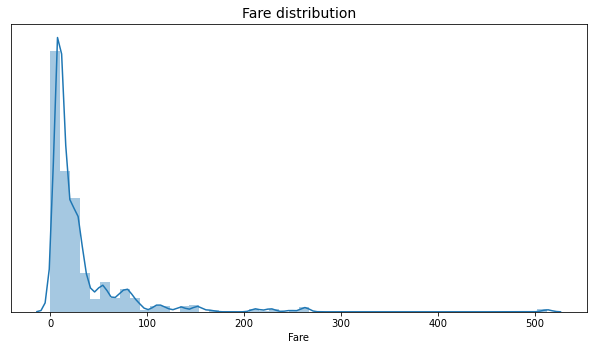

In [135]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([1,1,1,1])
ax.set_title('Fare distribution',fontsize=14)
sns.distplot(train_df['Fare'],ax=ax)
plt.yticks([])

Most people that travelled on Titanic have low Fares and very few people actually have high priced tickets. Moreover, 75% of the Fares are <= 31

While buying the ticket, passengers are also expected to submit their personal details. Let's look at the Name, Age, Sex, SibSp, and Parch.

In [136]:
len(pd.unique(train_df['Name']))

891

In [137]:
#The name field by itself might not be very useful but the last name might say something
#We'll also drop the Name column
train_df['Last_Name'] = train_df['Name'].apply(lambda val: val.split(',')[0])
train_df.drop(labels='Name',axis=1,inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Last_Name
0,0,3,male,22.0,1,0,7.2500,S,Mr,Braund
1,1,1,female,38.0,1,0,71.2833,C,Mrs,Cumings
2,1,3,female,26.0,0,0,7.9250,S,Miss,Heikkinen
3,1,1,female,35.0,1,0,53.1000,S,Mrs,Futrelle
4,0,3,male,35.0,0,0,8.0500,S,Mr,Allen


(-0.5, 999.5, 599.5, -0.5)

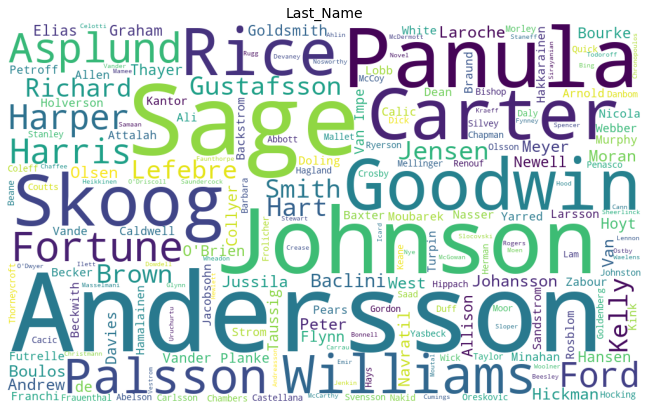

In [138]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=600,background_color='white')
plt.figure(figsize=(12,7))
plt.title('Last_Name',fontsize=14)
plt.imshow(wc.generate(' '.join(train_df['Last_Name'].values)))
plt.axis('off')

There are few Last_names that are repeated, this might mean there are families aboard the RMS Titanic.
we will check the parch and sibsp fields

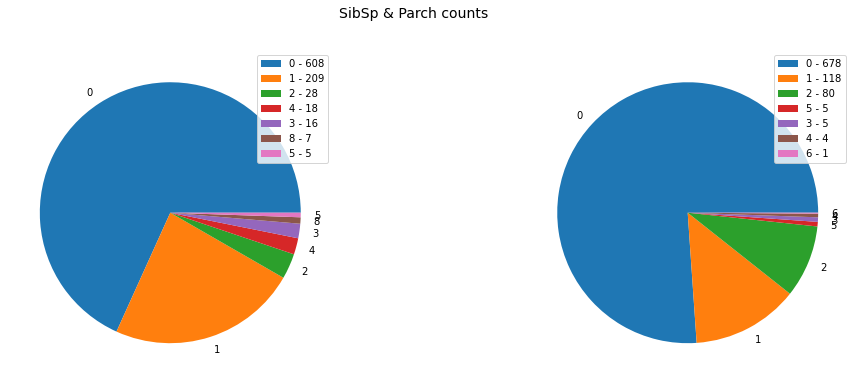

In [139]:
fig, axs = plt.subplots(1,2,figsize=(17,6))
plt.suptitle('SibSp & Parch counts',fontsize=14)
cols = ['SibSp','Parch']
axs = axs.flatten()
for col,ind in zip(cols,range(len(cols))):
    #sns.countplot(col,data=train_df,ax=axs[ind])
    val_counts = train_df[col].value_counts()
    axs[ind].pie(val_counts.values,labels=val_counts.keys())
    labels = np.char.add(np.char.add(np.array(val_counts.keys()).astype(str),' - '),val_counts.values.astype(str))
    axs[ind].legend(labels=labels,loc='upper right')

Great! our previous observation seems to be true, there are higher values in Siblings/Spouse and Parents/Children

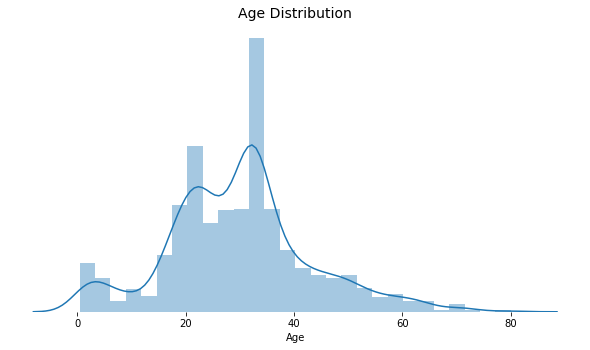

In [140]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([1,1,1,1])
plt.title('Age Distribution',fontsize=14)
sns.distplot(train_df['Age'],ax=ax)
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

Most people are middle-aged. 
We are essentially removing the visibility of spines to not show the plot borders

<ipython-input-141-78a7b57a37ed>:9: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='{:.2f}%'.format(p.get_height()/records),xy=(p.get_x()+0.35,p.get_height()+0.3))


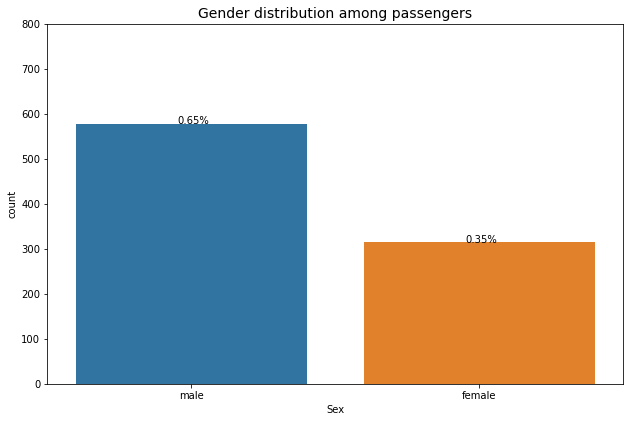

In [141]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([1,1,1,1])
ax.set_title('Gender distribution among passengers',fontsize=14)
sns.countplot(train_df['Sex'],ax=ax)
ax.set_ylim(0,800)

records = len(train_df)
for p in ax.patches:
    ax.annotate(s='{:.2f}%'.format(p.get_height()/records),xy=(p.get_x()+0.35,p.get_height()+0.3))

Once a passenger buys a ticket, a class and embarking port are assigned. Let's look at them

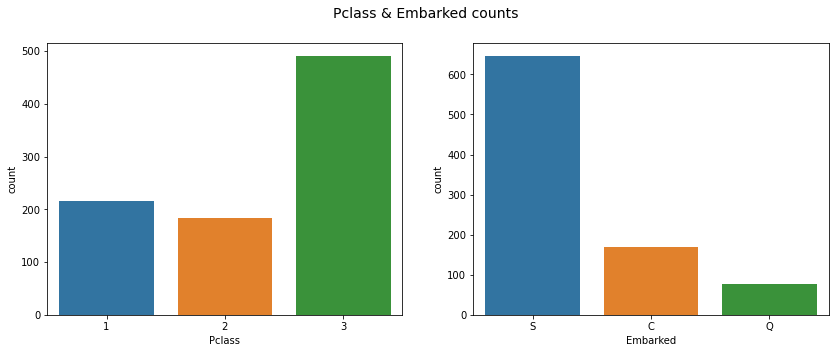

In [142]:
fig,axs = plt.subplots(1,2,figsize=(14,5))
axs = axs.flatten()
plt.suptitle('Pclass & Embarked counts',fontsize=14)
cols = ['Pclass','Embarked']
for col,ind in zip(cols,range(len(cols))):
    sns.countplot(x=train_df[col],ax=axs[ind])
    

There can be many insights, these are readily inferred:
    1. Class 3 has the highest # passengers, that can say order of luxury(highest to lowest): 1,2,3
    2. It is highly likely that most people from class 3 embarked at 'S'

And Finally! The voyage begins, so does the story...

In [143]:
#Let's make two copies of data to follow different approaches to data
data_bins = train_df.copy(deep=True)
data_continuous = train_df.copy(deep = True)
data_bins.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Last_Name
0,0,3,male,22.0,1,0,7.2500,S,Mr,Braund
1,1,1,female,38.0,1,0,71.2833,C,Mrs,Cumings
2,1,3,female,26.0,0,0,7.9250,S,Miss,Heikkinen
3,1,1,female,35.0,1,0,53.1000,S,Mrs,Futrelle
4,0,3,male,35.0,0,0,8.0500,S,Mr,Allen


When working with continous values becomes hard, binning is a great workaround. Are there any variables that would make our life easy with binning?

Age and Fare could use some binning

In [144]:
data_bins['Age'] = pd.cut(data_bins['Age'],[0,15,25,35,45,60,80])
data_bins['Fare'] = pd.cut(data_bins['Fare'],[0,10,20,35,60,80,100,200,300,400,515])
data_bins.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Last_Name
0,0,3,male,"(15, 25]",1,0,"(0, 10]",S,Mr,Braund
1,1,1,female,"(35, 45]",1,0,"(60, 80]",C,Mrs,Cumings
2,1,3,female,"(25, 35]",0,0,"(0, 10]",S,Miss,Heikkinen
3,1,1,female,"(25, 35]",1,0,"(35, 60]",S,Mrs,Futrelle
4,0,3,male,"(25, 35]",0,0,"(0, 10]",S,Mr,Allen


<AxesSubplot:title={'center':'Survival by passenger class'}, xlabel='Pclass', ylabel='count'>

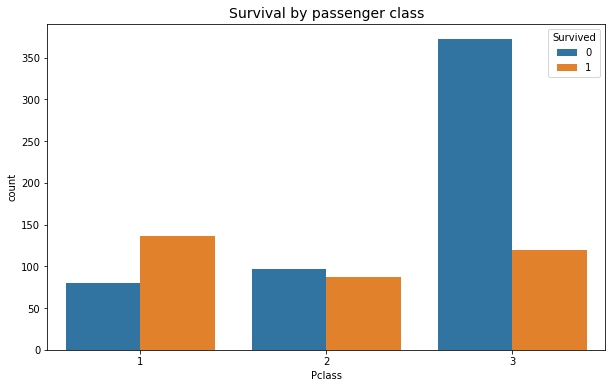

In [145]:
plt.figure(figsize=(10,6))
plt.title('Survival by passenger class',fontsize=14)
sns.countplot(x=data_bins['Pclass'],hue=data_bins['Survived'])

<AxesSubplot:title={'center':'Survival by Embarked port'}, xlabel='Embarked', ylabel='count'>

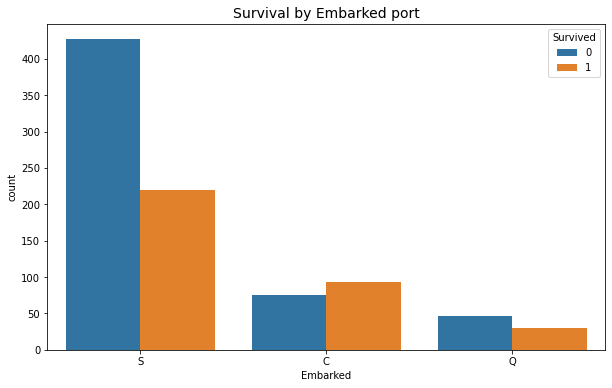

In [146]:
plt.figure(figsize=(10,6))
plt.title('Survival by Embarked port',fontsize=14)
sns.countplot(x=data_bins['Embarked'],hue=data_bins['Survived'])

Class 3 & S has most deaths given the number of passengers. We can now say that the passengers in class 3 are in the most dangerous location of the ship

We shall now check if there are Last_names that have better survival rates than others

In [147]:
data_bins['one'] = 1
grouped = data_bins.groupby(by='Last_Name')[['Last_Name','Survived','one']].sum()
grouped['survival_rate'] = grouped['Survived']/grouped['one']
grouped.reset_index(inplace=True)

In [148]:
grouped[grouped['one']>2].sort_values(by='survival_rate',ascending=False)


,Last_Name,Survived,one,survival_rate
32,Baclini,4,4,1.000000
507,Richards,3,3,1.000000
306,Kelly,3,4,0.750000
25,Asplund,3,4,0.750000
76,Brown,3,4,0.750000
239,Harper,3,4,0.750000
327,Laroche,2,3,0.666667
271,Hoyt,2,3,0.666667
428,Navratil,2,3,0.666667
430,Newell,2,3,0.666667


From the above table, we can notice there are many Last_names possibly belonging to 3 class or the Last_names having highest survival rate are some of the most prominant or important people

In [149]:
data_bins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    int64   
 1   Pclass     891 non-null    int64   
 2   Sex        891 non-null    object  
 3   Age        891 non-null    category
 4   SibSp      891 non-null    int64   
 5   Parch      891 non-null    int64   
 6   Fare       876 non-null    category
 7   Embarked   891 non-null    object  
 8   Title      891 non-null    object  
 9   Last_Name  891 non-null    object  
 10  one        891 non-null    int64   
dtypes: category(2), int64(5), object(4)
memory usage: 65.2+ KB


Let's convert Pclass to category type

In [150]:
data_bins['Pclass'] = data_bins['Pclass'].astype('category')
data_bins['Age'] = data_bins['Age'].astype('category')
data_bins['Fare'] = data_bins['Fare'].astype('category')

In [151]:
data_ohe = data_bins.drop(labels=['Last_Name'],axis=1).copy()
data_ohe = pd.get_dummies(data_ohe)
data_ohe.tail()

,Survived,SibSp,Parch,one,Pclass_1,Pclass_2,Pclass_3,...,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Top
886,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1
887,1,0,0,1,1,0,0,...,0,1,0,1,0,0,0
888,0,1,2,1,0,0,1,...,0,1,0,1,0,0,0
889,1,0,0,1,1,0,0,...,0,0,0,0,1,0,0
890,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0


In [152]:
data_bins['Age'] = data_bins['Age'].astype(str)
data_bins['Fare'] = data_bins['Fare'].astype(str)

In [153]:
le = LabelEncoder()
data_le = data_bins.copy(deep=True)
data_le[['Title','Sex','Age','Fare','Embarked']] = data_le[['Title','Sex','Age','Fare','Embarked']].apply(le.fit_transform)
data_le.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Last_Name,one
886,0,2,1,2,0,0,1,2,4,Montvila,1
887,1,1,0,1,0,0,3,2,1,Graham,1
888,0,3,0,1,1,2,3,2,1,Johnston,1
889,1,1,1,2,0,0,3,0,2,Behr,1
890,0,3,1,2,0,0,0,1,2,Dooley,1


In [154]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix

In [155]:
def run_model(model,X_train,Y_train,X_test,Y_test):
    '''Applies the model specified in NAME on the X_train, y_train
    with cross-validation #cv times and returns accuracy'''
    
    model.fit(X_train,Y_train)
    #y_pred = model.predict(X_test)
   # y_pred_train = model.predict(X_train)
    # Score method to get accuracy of model
    score = model.score(X_test,Y_test)
    print("Accuracy score of model:",score.round(2))


    predicted = model.predict(X_train)
    print("train report : " + '\n' + classification_report(Y_train,predicted))

    predicted = model.predict(X_test)
    print("test report : " + '\n' + classification_report(Y_test,predicted))


    y_pred = model.predict(X_test)
    labels=['Fail','Pass']
    plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)
    plt.show()
#     y_pre = model.predict_proba(X_test)
#     score = roc_auc_score(Y_test,y_pred)
#     print("area under roc curve",score)
#     #Y_train
#     fpr, tpr, thresholds = roc_curve(Y_test, y_pre[:,1])
#     plt.figure()
#     plt.plot(fpr, tpr, label='Model')
#     plt.plot([0,1],[0,1],'r--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title("Reciever Operating Characteristic")
#     plt.legend(loc='lower right')
#     plt.show()
    

In [156]:
data = data_le.loc[:,'Pclass':'Title']
output = data_le['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(data, output, test_size=0.25, stratify = output,random_state=0)


In [157]:
param_grid = { "penalty" : ["l1", "l2"],
              "C" : [0.1,0.2,0.5,0.6,0.8,1.0],
              "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
              }

from sklearn.model_selection import GridSearchCV, cross_val_score
lr = LogisticRegression(class_weight = "balanced")
clf = GridSearchCV(estimator=lr, param_grid=param_grid, n_jobs=-1,scoring = "accuracy")
clf.fit(X_train, Y_train)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.5, 0.6, 0.8, 1.0],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [158]:
clf.best_params_

{'C': 0.2, 'penalty': 'l2', 'solver': 'newton-cg'}

Accuracy score of model: 0.78
train report : 
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       412
           1       0.71      0.79      0.75       256

    accuracy                           0.80       668
   macro avg       0.79      0.80      0.79       668
weighted avg       0.80      0.80      0.80       668

test report : 
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       137
           1       0.70      0.74      0.72        86

    accuracy                           0.78       223
   macro avg       0.76      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



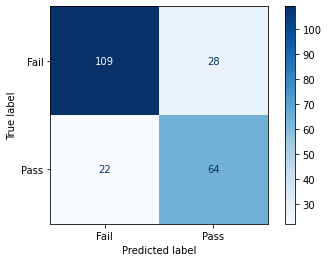

In [159]:
run_model(LogisticRegression(C=0.2,penalty= "l2", solver = "newton-cg", class_weight = "balanced"),X_train, Y_train, X_test, Y_test)

In [171]:
param_grid = { "n_neighbors" : [1,3,5,7,9,11,13],
              }

from sklearn.model_selection import GridSearchCV, cross_val_score
knn =  KNeighborsClassifier(n_jobs=-1)
knn_cv = GridSearchCV(estimator=knn, param_grid=param_grid, n_jobs=-1)
knn_cv.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13]})

In [172]:
knn_cv.best_params_

{'n_neighbors': 3}

Accuracy score of model: 0.76
train report : 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       412
           1       0.82      0.82      0.82       256

    accuracy                           0.86       668
   macro avg       0.85      0.85      0.85       668
weighted avg       0.86      0.86      0.86       668

test report : 
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       137
           1       0.72      0.63      0.67        86

    accuracy                           0.76       223
   macro avg       0.75      0.74      0.74       223
weighted avg       0.76      0.76      0.76       223



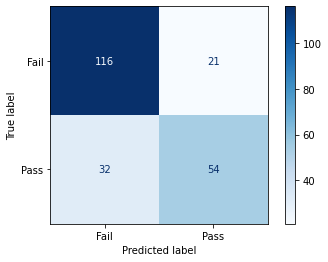

In [173]:
knn = KNeighborsClassifier(n_neighbors = 3)
run_model(knn,X_train, Y_train, X_test, Y_test)

In [174]:
param_grid = { "criterion" : ["gini", "entropy"],
              "min_samples_leaf" : [1, 5, 10, 25, 50, 70],
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], 
              "n_estimators": [100, 400, 700, 1000, 1500]}

from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 70],
                         'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35],
                         'n_estimators': [100, 400, 700, 1000, 1500]})

In [175]:
clf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 35,
 'n_estimators': 1500}

Accuracy score of model: 0.82
train report : 
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       412
           1       0.84      0.74      0.79       256

    accuracy                           0.85       668
   macro avg       0.84      0.83      0.83       668
weighted avg       0.85      0.85      0.84       668

test report : 
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       137
           1       0.82      0.69      0.75        86

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



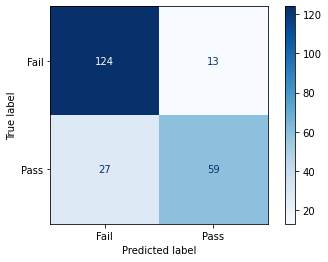

In [176]:
#Let's tune the RandomForest hyperparameters
random_forest = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 35,   
                                       n_estimators=1500, 
                                       max_features='auto', 
                                       n_jobs=-1)


run_model(random_forest,X_train, Y_train, X_test, Y_test)
#print('Best RandomForest accuracy: ',cv_acc)

In [177]:
data_continuous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        891 non-null    float64
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Fare       891 non-null    float64
 7   Embarked   891 non-null    object 
 8   Title      891 non-null    object 
 9   Last_Name  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [178]:
data_continuous.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Last_Name
0,0,3,male,22.0,1,0,7.2500,S,Mr,Braund
1,1,1,female,38.0,1,0,71.2833,C,Mrs,Cumings
2,1,3,female,26.0,0,0,7.9250,S,Miss,Heikkinen
3,1,1,female,35.0,1,0,53.1000,S,Mrs,Futrelle
4,0,3,male,35.0,0,0,8.0500,S,Mr,Allen


In [179]:
data_continuous['Pclass'] = data_continuous['Pclass'].astype('object')
# data_continuous['Sex'] = data_continuous['Sex'].astype('category')
# data_continuous['Embarked'] = data_continuous['Embarked'].astype('category')
data_continuous.drop(['Last_Name'],inplace = True , axis = 1)

In [180]:
data_continuous.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [181]:
category_cols = data_continuous.dtypes.pipe(lambda x : x[ x == "object"]).index.tolist()
category_cols

['Pclass', 'Sex', 'Embarked', 'Title']

In [182]:
output = data_continuous['Survived']
data_continuous.drop(['Survived'],axis = 1, inplace = True)

In [183]:
import category_encoders as ce

In [184]:
count_enc = ce.CountEncoder()
count_encoded = count_enc.fit_transform(data_continuous[category_cols])

data_continuous = data_continuous.join(count_encoded.add_suffix("_count"))

In [185]:
data_continuous

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Pclass_count,Sex_count,Embarked_count,Title_count
0,3,male,22.000000,1,0,7.2500,S,Mr,491,577,646,517
1,1,female,38.000000,1,0,71.2833,C,Mrs,216,314,168,125
2,3,female,26.000000,0,0,7.9250,S,Miss,491,314,646,183
3,1,female,35.000000,1,0,53.1000,S,Mrs,216,314,646,125
4,3,male,35.000000,0,0,8.0500,S,Mr,491,577,646,517
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S,Top,184,577,646,26
887,1,female,19.000000,0,0,30.0000,S,Miss,216,314,646,183
888,3,female,21.816327,1,2,23.4500,S,Miss,491,314,646,183
889,1,male,26.000000,0,0,30.0000,C,Mr,216,577,168,517


In [186]:
data_continuous.drop(category_cols,axis=1,inplace=True)
data_continuous

,Age,SibSp,Parch,Fare,Pclass_count,Sex_count,Embarked_count,Title_count
0,22.000000,1,0,7.2500,491,577,646,517
1,38.000000,1,0,71.2833,216,314,168,125
2,26.000000,0,0,7.9250,491,314,646,183
3,35.000000,1,0,53.1000,216,314,646,125
4,35.000000,0,0,8.0500,491,577,646,517
...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,184,577,646,26
887,19.000000,0,0,30.0000,216,314,646,183
888,21.816327,1,2,23.4500,491,314,646,183
889,26.000000,0,0,30.0000,216,577,168,517


In [187]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
stdscalar = MinMaxScaler()
data_continuous[data_continuous.columns] = stdscalar.fit_transform(data_continuous[data_continuous.columns].values)
data_continuous

,Age,SibSp,Parch,Fare,Pclass_count,Sex_count,Embarked_count,Title_count
0,0.271174,0.125,0.000000,0.014151,1.000000,1.0,1.00000,1.000000
1,0.472229,0.125,0.000000,0.139136,0.104235,0.0,0.15993,0.201629
2,0.321438,0.000,0.000000,0.015469,1.000000,0.0,1.00000,0.319756
3,0.434531,0.125,0.000000,0.103644,0.104235,0.0,1.00000,0.201629
4,0.434531,0.000,0.000000,0.015713,1.000000,1.0,1.00000,1.000000
...,...,...,...,...,...,...,...,...
886,0.334004,0.000,0.000000,0.025374,0.000000,1.0,1.00000,0.000000
887,0.233476,0.000,0.000000,0.058556,0.104235,0.0,1.00000,0.319756
888,0.268866,0.125,0.333333,0.045771,1.000000,0.0,1.00000,0.319756
889,0.321438,0.000,0.000000,0.058556,0.104235,1.0,0.15993,1.000000


In [188]:
X_train, X_test, Y_train, Y_test = train_test_split(data_continuous, output, test_size=0.25, stratify = output,random_state=0)

In [189]:
param_grid = { "penalty" : ["l1", "l2"],
              "C" : [0.1,0.2,0.5,0.6,0.8,1.0],
              "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
              }

from sklearn.model_selection import GridSearchCV, cross_val_score
lr = LogisticRegression(class_weight = "balanced")
clf = GridSearchCV(estimator=lr, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.5, 0.6, 0.8, 1.0],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [90]:
clf.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

Accuracy score of model: 0.82
train report : 
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       412
           1       0.77      0.73      0.75       256

    accuracy                           0.81       668
   macro avg       0.80      0.79      0.80       668
weighted avg       0.81      0.81      0.81       668

test report : 
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       137
           1       0.81      0.69      0.74        86

    accuracy                           0.82       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.82      0.82      0.81       223



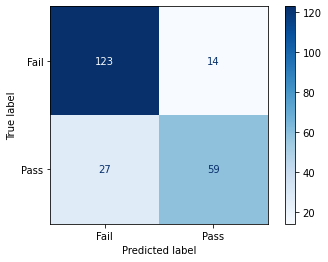

In [190]:
#X_train, X_test, Y_train, Y_test = train_test_split(data_continuous, output, test_size=0.25, stratify = output,random_state=0)
run_model(LogisticRegression(C = 1.0, penalty = "l1", solver = "liblinear"),X_train, Y_train, X_test, Y_test)



In [194]:
param_grid = { "n_neighbors" : [1,5,7,9,11,13,15,17,19,21,23],
              }

from sklearn.model_selection import GridSearchCV, cross_val_score
knn =  KNeighborsClassifier(n_jobs=-1)
knn_cv = GridSearchCV(estimator=knn, param_grid=param_grid, n_jobs=-1)
knn_cv.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23]})

In [195]:
knn_cv.best_params_

{'n_neighbors': 11}

Accuracy score of model: 0.83
train report : 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       412
           1       0.83      0.70      0.76       256

    accuracy                           0.83       668
   macro avg       0.83      0.81      0.81       668
weighted avg       0.83      0.83      0.83       668

test report : 
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       137
           1       0.89      0.63      0.73        86

    accuracy                           0.83       223
   macro avg       0.84      0.79      0.80       223
weighted avg       0.83      0.83      0.82       223



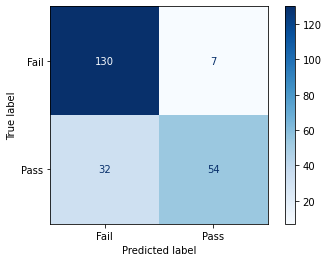

In [196]:
knn = KNeighborsClassifier(n_neighbors = 11)
run_model(knn,X_train, Y_train, X_test, Y_test)

In [197]:
param_grid = { "criterion" : ["gini", "entropy"],
              "min_samples_leaf" : [1, 5, 10, 25, 50, 70],
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], 
              "n_estimators": [100, 400, 700, 1000, 1500]}

from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 70],
                         'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35],
                         'n_estimators': [100, 400, 700, 1000, 1500]})

In [198]:
clf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1500}

Accuracy score of model: 0.83
train report : 
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       412
           1       0.92      0.84      0.88       256

    accuracy                           0.91       668
   macro avg       0.92      0.90      0.91       668
weighted avg       0.91      0.91      0.91       668

test report : 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       137
           1       0.86      0.69      0.76        86

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223



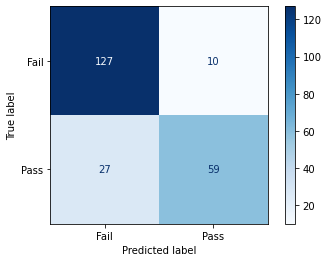

In [199]:
#Let's tune the RandomForest hyperparameters
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=1500, 
                                       max_features='auto', 
                                       n_jobs=-1)


run_model(random_forest,X_train, Y_train, X_test, Y_test)
#print('Best RandomForest accuracy: ',cv_acc)